In [2]:
import numpy as np
from scipy.optimize import approx_fprime
import matplotlib.pyplot as plt

In [3]:
# Define the Mean Squared Error loss
def mse_loss(params, x, y):
    m, b = params
    y_pred = m * x + b
    return np.mean((y - y_pred) ** 2)

In [4]:
# Gradient Descent Step using Scipy gradient approximation
def gradient_step(x, y, m, b, lr=0.1):
    params = np.array([m, b])
    gradient = approx_fprime(params, lambda p: mse_loss(p, x, y), epsilon=1e-6)
    
    m_new = m - lr * gradient[0]
    b_new = b - lr * gradient[1]
    error = mse_loss([m_new, b_new], x, y)

    return m_new, b_new, error


In [9]:
# Initial data
x = np.array([1, 3])
y = np.array([3,6])

# Initialize parameters
m = -1
b = 1
lr = 0.1
iterations = 10

# For tracking values
m_vals = [m]
b_vals = [b]
errors = [mse_loss([m, b], x, y)]

In [10]:

# Perform manual visible updates
for i in range(iterations):
    m, b, err = gradient_step(x, y, m, b, lr)
    print(f"Iteration {i+1}: m = {m:.4f}, b = {b:.4f}, error = {err:.4f}")
    m_vals.append(m)
    b_vals.append(b)
    errors.append(err)

# Final predictions
y_pred = m * x + b
print("\nFinal predictions:", y_pred)


Iteration 1: m = 1.7000, b = 2.1000, error = 1.0400
Iteration 2: m = 1.2600, b = 1.9000, error = 0.0640
Iteration 3: m = 1.3400, b = 1.9160, error = 0.0348
Iteration 4: m = 1.3336, b = 1.8968, error = 0.0318
Iteration 5: m = 1.3413, b = 1.8840, error = 0.0296
Iteration 6: m = 1.3464, b = 1.8707, error = 0.0276
Iteration 7: m = 1.3517, b = 1.8580, error = 0.0258
Iteration 8: m = 1.3568, b = 1.8457, error = 0.0240
Iteration 9: m = 1.3617, b = 1.8338, error = 0.0224
Iteration 10: m = 1.3665, b = 1.8224, error = 0.0209

Final predictions: [3.18884844 5.92177469]


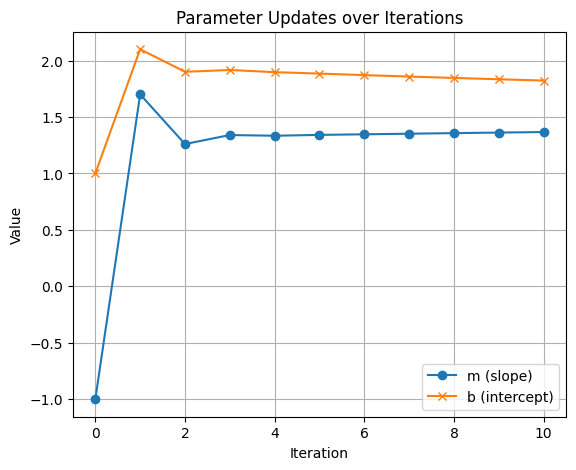

In [11]:
# Plot m, b over iterations
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(m_vals, label='m (slope)', marker='o')
plt.plot(b_vals, label='b (intercept)', marker='x')
plt.title('Parameter Updates over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

SUMMARY

The regression line undergoes 10 iterations of gradient descent, updating the slope m, intercept b, and calculating the error at each step:

Initial Error (Iteration 1): 1.0400
Final Error (Iteration 10): 0.0209
From the first to the second iteration, there's a sharp drop in error:

Error reduced from 1.0400 to 0.0640 :- a 93.8% decrease in just one step.

From iteration 2 to 5, the error continues to decline at a moderate rate, showing meaningful improvements:

Iteration 2 - 3: 0.0640 - 0.0348
Iteration 3 - 4: 0.0348 - 0.0318
Iteration 4 - 5: 0.0318 - 0.0296
From iteration 5 onward, the error decreases very slowly:

Early Stopping
Given the very small improvements after iteration 5 (approx:0.00174 per iteration), it’s reasonable to apply early stopping at that point especially for larger datasets where:
- Additional iterations may be computationally expensive
- Overfitting or vanishing gains may occur
- Training time can be saved with minimal performance trade-off


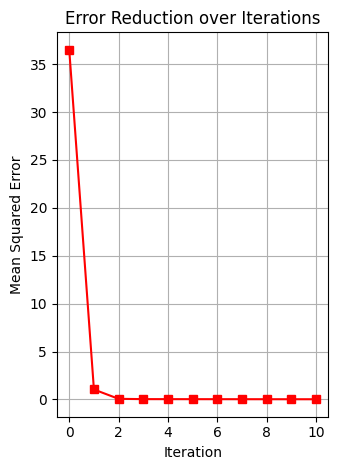

In [ ]:
# Plot Error over iterations
plt.subplot(1, 2, 2)
plt.plot(errors, label='MSE', color='red', marker='s')
plt.title('Error Reduction over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.grid(True)

plt.tight_layout()
plt.show()